载入新西兰汇率数据

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.figure import Figure

Z=pd.read_csv("data/pounds_nz.dat",sep="\t")
Z.index = pd.date_range(start="1991Q1",periods=len(Z),freq="Q")

In [2]:
Z.head()

,xrate
1991-03-31,2.9243
1991-06-30,2.9422
1991-09-30,3.1719
1991-12-31,3.2542
1992-03-31,3.3479


In [3]:
from statsmodels.tsa.api import acf
from statsmodels.graphics.tsaplots import plot_acf

In [4]:
from statsmodels.tsa.api import ExponentialSmoothing

In [11]:
model = ExponentialSmoothing(Z["xrate"], trend="add", seasonal="add")
fit = model.fit(smoothing_level=1,smoothing_seasonal=0)

d:\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
d:\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [12]:
fit.summary()

Dep. Variable:,endog,No. Observations:,39
Model:,ExponentialSmoothing,SSE,0.660
Optimized:,True,AIC,-143.072
Trend:,Additive,BIC,-129.763
Seasonal:,Additive,AICC,-135.214
Seasonal Periods:,4,Date:,"Sun, 28 Jun 2020"
Box-Cox:,False,Time:,19:31:18
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,False
smoothing_slope,0.1863271,beta,True


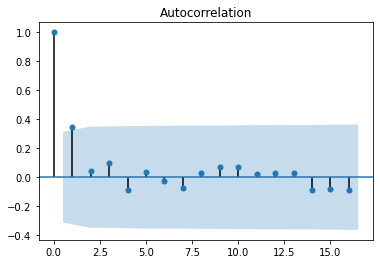

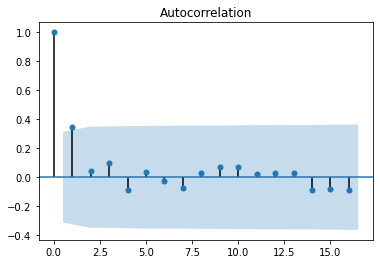

In [9]:
plot_acf(fit.resid)